In [12]:
#!pip install wordcloud
#!pip install sklearn
#!pip install plotly
!pip install chart-studio


In [18]:
import pandas as pd
from os import path
import glob
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
import re
from chart_studio.plotly import plot, iplot

import chart_studio.graph_objects as go


ModuleNotFoundError: No module named 'chart_studio.graph_objects'

In [3]:
def readTextsIntoDf(filepath=""):
	if filepath == "":
		dataPaths = "Articles/"
		filepaths = glob.glob(dataPaths+"*.txt")
		#print (filepaths)
		dataDict = {}
		for index, filepath in enumerate(filepaths):
			print ("Reading: {}".format(filepath))
			with open(filepath, "r+") as f:
				datas = []
				for line in f:
					datas.append(line)
					
			combinedData = " ".join(datas)
			dataDict[index] = combinedData
			
		dataDf = pd.DataFrame(dataDict, index=[0]).transpose()
		dataDf.rename(columns={0: "content"}, inplace=True)
		print ("Data is successfully stored in df ...")
		print (dataDf)
	else:
		dataDict = {}
		with open(filepath, "r") as f:
			datas = []
			line = f.read().strip("[").strip("]").strip("\n")
			datas.extend([x.strip("''") for x in line.split(",")])
		#print(datas[:3])


		dataDf = pd.DataFrame(datas)
		dataDf.rename(columns={0: "content"}, inplace=True)
		print ("Data is successfully stored in df ...")
		#print (dataDf)
		
	return dataDf

In [4]:
df = readTextsIntoDf("processed.txt")
processedData = df.content.values.tolist()
corpus = []
for word in processedData:
	if "_" in word:
		word = word.replace("_", " ")
	corpus.append(word)

Data is successfully stored in df ...


In [5]:
#Identify common words
freq = pd.Series(' '.join(df['content']).split()).value_counts()[:20]
print (freq)

'people    3358
'hand      3194
'eye       3100
'day       2218
'head      1908
'life      1820
'light     1791
'body      1774
'ship      1725
'woman     1589
'human     1525
'moment    1452
'water     1368
'night     1363
'child     1337
'story     1327
'arm       1278
'voice     1231
'bad       1198
'dead      1170
dtype: int64


In [6]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df 
         ['content']).split()).value_counts()[-20:]
print (freq1)

'unproven          1
'changedif         1
'udreb             1
'brokeback         1
'communiststhe     1
'schoolteacher     1
'lindsay           1
'wally             1
'chincatoan        1
'acrylic           1
'crooning          1
'girdle            1
'dolimitless       1
'synoptic          1
'toolmaker         1
'cinematically     1
'obstructionism    1
'palino            1
'whatsyourguess    1
'reinvest          1
dtype: int64


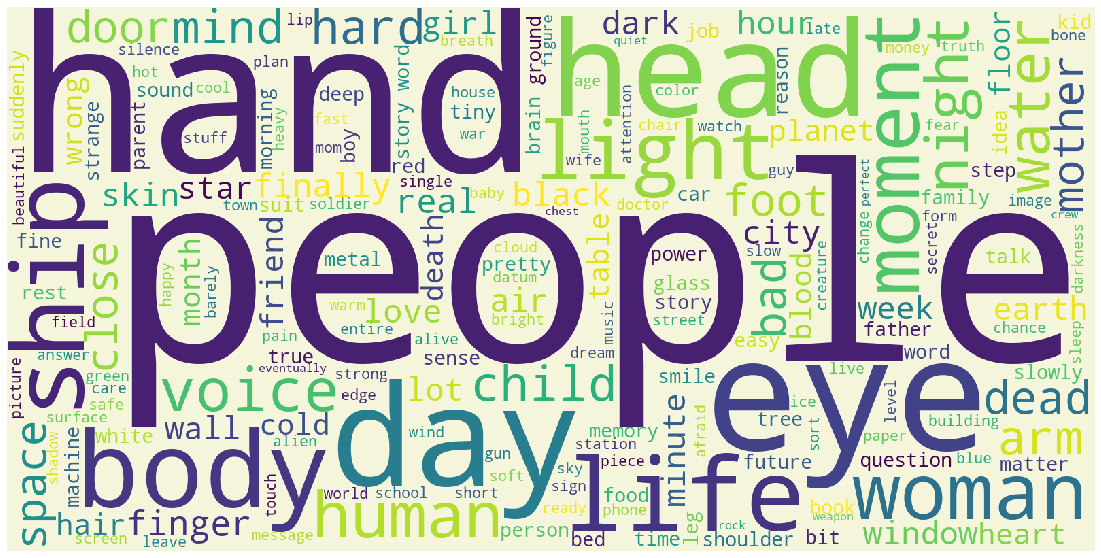

In [7]:
wordcloud = WordCloud(
                          background_color='beige',
                          max_words=200,
                          random_state=42,
                          width=1600,
                          height=800,
                         ).generate(str(processedData))
#print(wordcloud)
fig = plt.figure(1, figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)



PlotlyRequestError: Authentication credentials were not provided.